In [ ]:
%pip install -r requirements.txt

In [6]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('dataset.csv')

# Display basic information about the dataset
print(df.info())

# Show the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get unique values for categorical columns
print("Unique Soil Types:", df['Soil_Type'].nunique())
print("Unique Wilderness Areas:", df['Wilderness_Area'].nunique())
print("Unique Vegetation Types:", df['Vegetation_Type'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  4860 non-null   int64  
 1   Altitude                            4860 non-null   int64  
 2   Slope_Orientation                   4860 non-null   int64  
 3   Slope                               4860 non-null   int64  
 4   Horizontal_Distance_To_Water        4860 non-null   int64  
 5   Vertical_Distance_To_Water          4860 non-null   int64  
 6   Horizontal_Distance_To_Roadways     4860 non-null   int64  
 7   Shadow_Index_9h                     4860 non-null   int64  
 8   Shadow_Index_12h                    4860 non-null   int64  
 9   Shadow_Index_15h                    4860 non-null   int64  
 10  Horizontal_Distance_To_Fire_Points  4860 non-null   int64  
 11  Canopy_Density                      4860 no

In [9]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Remove 'Id' column
df = df.drop('Id', axis=1)

# Separate features and target
X = df.drop('Vegetation_Type', axis=1)
y = df['Vegetation_Type']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Fit and transform the features
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
numeric_feature_names = numeric_features.tolist()
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
feature_names = numeric_feature_names + categorical_feature_names

# Create a new dataframe with preprocessed features
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Print the first few rows of the preprocessed features
print("\nFirst few rows of preprocessed features:")
print(X_preprocessed_df.head())

# Print unique values in the target variable
print("\nUnique values in the target variable:")
print(y.unique())



Training set shape: (3888, 47)
Testing set shape: (972, 47)

First few rows of preprocessed features:
   Altitude  Slope_Orientation     Slope  Horizontal_Distance_To_Water  \
0  0.035767           1.732664 -1.556780                     -1.119401   
1  0.128069           1.511905  0.924673                     -0.675595   
2  0.028844          -0.796862 -1.669573                     -0.962763   
3  0.088841           1.438319  0.811880                     -0.962763   
4  0.543429          -1.339561 -0.428847                     -0.649488   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                   -0.838210                         0.315010   
1                   -0.098457                         1.074492   
2                   -0.838210                         1.188192   
3                   -0.511342                         1.147319   
4                   -0.734988                         2.711615   

   Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  

Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.97      0.98       438
      Type_3       0.90      0.41      0.56       318
      Type_4       0.53      1.00      0.70       216

    accuracy                           0.79       972
   macro avg       0.81      0.79      0.75       972
weighted avg       0.86      0.79      0.78       972



/home/nando/Projects/aprau/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


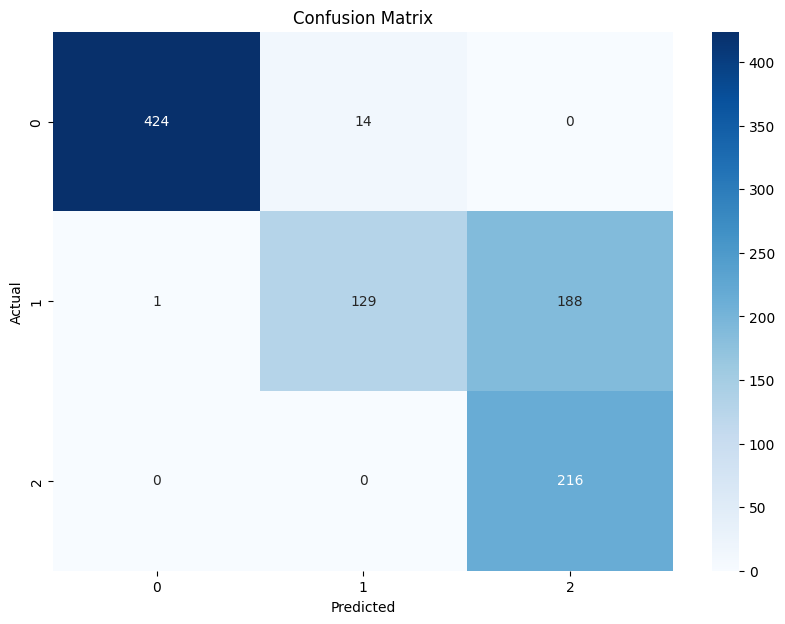

Accuracy: 0.7912

Top 10 most important features:
Shadow_Index_12h: 0.3060
Shadow_Index_9h: 0.3100
Horizontal_Distance_To_Water: 0.3274
Soil_Type_Type_10: 0.3318
Vertical_Distance_To_Water: 0.3780
Wilderness_Area_Area_4: 0.5968
Slope: 0.8349
Horizontal_Distance_To_Fire_Points: 1.0233
Horizontal_Distance_To_Roadways: 1.1889
Altitude: 1.6918


In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print the accuracy
accuracy = qda.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Print the top 10 most important features
feature_importance = np.abs(qda.means_[0] - qda.means_[1])
top_features = np.argsort(feature_importance)[-10:]
print("\nTop 10 most important features:")
for i in top_features:
    print(f"{feature_names[i]}: {feature_importance[i]:.4f}")

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('dataset.csv')

# Remove 'Id' column
df = df.drop('Id', axis=1)

# Separate features and target
X = df.drop('Vegetation_Type', axis=1)
y = df['Vegetation_Type']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create a pipeline with preprocessor and PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Fit and transform the features
X_preprocessed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Initialize and train the QDA model with regularization
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = qda.score(X_test, y_test)
print(f"\nAccuracy: {accuracy:.4f}")

# Print the number of components retained by PCA
print(f"\nNumber of components retained by PCA: {pca.n_components_}")

Training set shape: (3888, 15)
Testing set shape: (972, 15)

Classification Report:
              precision    recall  f1-score   support

      Type_1       0.98      0.98      0.98       438
      Type_3       0.91      0.75      0.83       318
      Type_4       0.74      0.93      0.82       216

    accuracy                           0.90       972
   macro avg       0.88      0.89      0.88       972
weighted avg       0.91      0.90      0.90       972


Accuracy: 0.8961

Number of components retained by PCA: 15
